#Week 4: Supervised Learning - Classification - Iris
-------------------------------------
Lab exercise kali ini menggunakan dataset iris:
https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv

Lakukan klasifikasi pada dataset tersebut dengan menggunakan 3 cara: Logistic Regression, Naive Bayes, dan K-Nearest Neighbor (dengan k=5)

## Import library

In [153]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

## Load Dataset

In [154]:
# Read CSV

url = "https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv"
df = pd.read_csv(url)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Data Preprocessing

Periksa apakah ada baris yang duplikat



In [155]:
df.duplicated().any()

True

Periksa apakah ada missing values

In [156]:
df.isnull().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool

Periksa outlier dengan boxplot untuk setiap kolom feature

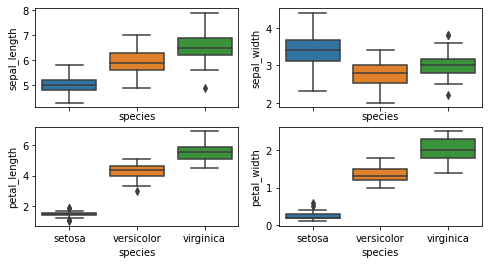

In [157]:
fig, axes = plt.subplots(2, 2, sharex=True, figsize=(8,4))
sns.boxplot(ax=axes[0, 0], data=df, x='species', y='sepal_length')
sns.boxplot(ax=axes[0, 1], data=df, x='species', y='sepal_width')
sns.boxplot(ax=axes[1, 0], data=df, x='species', y='petal_length')
sns.boxplot(ax=axes[1, 1], data=df, x='species', y='petal_width')

Pisahkan dataset menjadi variabel independen dan variabel dependen

In [158]:
X = df.iloc[:,:-1].values
y = df.iloc[:, -1].values

Pisahkan dataset train dan test dataset, dengan ukuran dataset test 0.1

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

Lakukan fitur scaling pada variabel X_train dan X_test. 

In [160]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Logistic Regression

Bangun model dan ukur accuracy nya

In [161]:
lgclassifier = LogisticRegression(random_state = 0)
lgclassifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

Uji model dengan dataset test

In [162]:
lg_y_pred = lgclassifier.predict(X_test)
print(lg_y_pred)

['virginica' 'virginica' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'virginica' 'versicolor' 'setosa' 'virginica' 'setosa'
 'setosa' 'virginica' 'versicolor' 'versicolor']


In [163]:
from sklearn.metrics import confusion_matrix, accuracy_score

lgcm = confusion_matrix(y_test, lg_y_pred)
print("Confusion Matrix\n", lgcm)

print("Accuracy Score: ", accuracy_score(y_test, lg_y_pred))

Confusion Matrix
 [[3 0 0]
 [0 5 0]
 [0 1 6]]
Accuracy Score:  0.9333333333333333


# Naive Bayes

Buat model persamaan berdasarkan data training yang sudah dibuat pada tahap preprocess

In [164]:
nbclassifier = GaussianNB()
nbclassifier.fit(X_train, y_train)

GaussianNB()

Uji hasil model dengan data test

In [165]:
nb_y_pred = nbclassifier.predict(X_test)
print(nb_y_pred)

['virginica' 'virginica' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'virginica' 'versicolor' 'setosa' 'virginica' 'setosa'
 'setosa' 'virginica' 'versicolor' 'versicolor']


Ukur akurasi dari model persamaan Naive Bayes Classifier

In [166]:
nbcm = confusion_matrix(y_test, nb_y_pred)
print("Confusion Matrix\n", nbcm)

print("Accuracy Score: ", accuracy_score(y_test, nb_y_pred))

Confusion Matrix
 [[3 0 0]
 [0 5 0]
 [0 1 6]]
Accuracy Score:  0.9333333333333333


# K-Nearest Neighbour (K-NN) Classifier

Buatlah model KNN berdasarkan data training yang sudah dibuat di tahap preprocess, gunakan metric pengukuran jarak 'euclidean'

In [167]:
knnclassifier = KNeighborsClassifier(n_neighbors = 5, metric = "euclidean", p = 2)
knnclassifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

Uji model dengan data test

In [168]:
knn_y_pred =knnclassifier.predict(X_test)
print(knn_y_pred)

['virginica' 'virginica' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'virginica' 'versicolor' 'setosa' 'virginica' 'setosa'
 'setosa' 'virginica' 'versicolor' 'versicolor']


Ukur akurasi dari model K-Nearest Neighbor

In [169]:
knncm = confusion_matrix(y_test, knn_y_pred)
print("Confusion Matrix\n", knncm)

print("Accuracy Score: ", accuracy_score(y_test, knn_y_pred))

Confusion Matrix
 [[3 0 0]
 [0 5 0]
 [0 1 6]]
Accuracy Score:  0.9333333333333333


#Kesimpulan
Dari 3 model klasifikasi di atas (Logistic Regression, Naive Bayes, K-Nearest Neighbor) model klasifikasi dengan akurasi tertinggi adalah...

**Dari hasil percobaan diatas, ketiga model memiliki akurasi sama yaitu 0.93333**